In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

In [3]:
#read train, test folders
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [5]:
#image classes
image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [6]:
def plot_image(image_classes):
    plt.figure(figsize = (12,12))
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        #load image
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

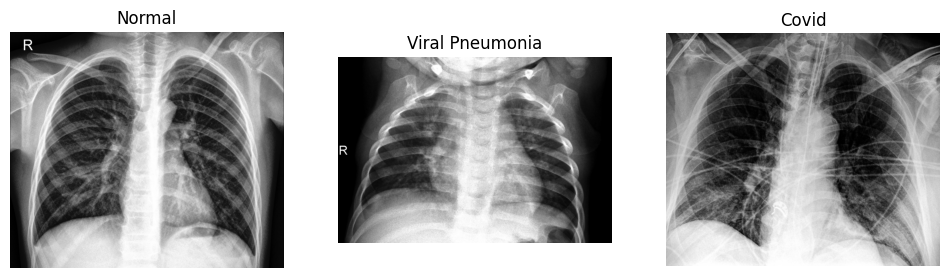

In [7]:
plot_image(image_classes)

In [8]:
#define ImageDataGenerator
data_generator = ImageDataGenerator(rescale = 1/255)

In [9]:
#apply data_generator on train data
train_data = data_generator.flow_from_directory(train_path,
                                               target_size = (224, 224),
                                               batch_size = 16)

Found 251 images belonging to 3 classes.


In [10]:
#apply data_generator on test data
test_data = data_generator.flow_from_directory(test_path,
                                              target_size = (224, 224),
                                              )

Found 66 images belonging to 3 classes.


In [11]:
#MLP Model
mlp_model = Sequential()
#input layer ----> hidden layer ----> hidden layer ----> hidden layer -----> Output layer

#input layer ---> Flatten 
mlp_model.add(Flatten(input_shape = (224, 224, 3)))

#hidden layer ----> Dense
mlp_model.add(Dense(128, activation = 'relu'))

#hidden layer ----> Dense
mlp_model.add(Dense(64, activation = 'relu'))

#hidden layer ----> Dense
mlp_model.add(Dense(128, activation = 'relu'))

#output layer ----> Dense
mlp_model.add(Dense(3, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,284,675 (73.57 MB)

 Trainable params: 19,284,675 (73.57 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#model compile
mlp_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [14]:
#fit mlp_model
model_history = mlp_model.fit(train_data,
                             epochs = 5,
                             validation_data = test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/16 ━━━━━━━━━━━━━━━━━━━━ 1:36 6s/step - accuracy: 0.2500 - loss: 1.1988

I0000 00:00:1723200546.597842     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723200546.616475     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 455ms/step - accuracy: 0.4206 - loss: 13.8153 - val_accuracy: 0.3333 - val_loss: 5.8882
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.4839 - loss: 5.4729 - val_accuracy: 0.5909 - val_loss: 4.8536
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 240ms/step - accuracy: 0.7656 - loss: 1.8847 - val_accuracy: 0.8182 - val_loss: 2.1556
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.8870 - loss: 0.9176 - val_accuracy: 0.7121 - val_loss: 1.9399
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.8505 - loss: 0.9790 - val_accuracy: 0.8182 - val_loss: 1.7494


In [15]:
#CNN Model
cnn_model = Sequential()
#conclutional layers (hidden) + Classification layers

#input layer 
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu',
                     input_shape = [224, 224, 3]))
#pooling layer
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#hidden layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
#pooling layer
cnn_model.add(MaxPooling2D())

#hidden layer
cnn_model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
#pooling layer
cnn_model.add(MaxPooling2D())

#Faltten layer
cnn_model.add(Flatten())

#Fully connected
cnn_model.add(Dense(128, activation = 'relu'))

#Fully connected
cnn_model.add(Dense(128, activation = 'relu'))

#output
cnn_model.add(Dense(3, activation = 'softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,495,875 (24.78 MB)

 Trainable params: 6,495,875 (24.78 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#compile mode
cnn_model.compile(optimizer = 'adam',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [18]:
#fit model
model_history = cnn_model.fit(train_data, 
                             epochs = 5,
                             validation_data = test_data)

Epoch 1/5


2024-08-09 10:49:44.340254: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100575: 1.87379, expected 1.57926
2024-08-09 10:49:44.340576: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150528: 3.95832, expected 3.44133
2024-08-09 10:49:44.340613: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150534: 4.15218, expected 3.63519
2024-08-09 10:49:44.340626: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150535: 4.02956, expected 3.51257
2024-08-09 10:49:44.340636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150536: 3.63562, expected 3.11863
2024-08-09 10:49:44.340648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150538: 3.86037, expected 3.34338
2024-08-09 10:49:44.340659: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150539: 3.47832, expected 2.96133
2024-08-09 10:49:44.

 9/16 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.3233 - loss: 1.6426

2024-08-09 10:49:50.670126: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 3.38019, expected 2.90787
2024-08-09 10:49:50.670198: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 2.65154, expected 2.17922
2024-08-09 10:49:50.670213: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.34933, expected 2.87701
2024-08-09 10:49:50.670229: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.57785, expected 3.10553
2024-08-09 10:49:50.670262: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 3.64667, expected 3.17435
2024-08-09 10:49:50.670273: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.30996, expected 2.83764
2024-08-09 10:49:50.670284: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67: 3.19252, expected 2.7202
2024-08-09 10:49:50.670295: E external/local_xla/

13/16 ━━━━━━━━━━━━━━━━━━━━ 1s 439ms/step - accuracy: 0.3378 - loss: 1.6340

2024-08-09 10:49:55.193999: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 223: 2.38178, expected 1.97036
2024-08-09 10:49:55.194120: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11647: 2.9597, expected 2.54828
2024-08-09 10:49:55.194327: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 49971: 3.08701, expected 2.67559
2024-08-09 10:49:55.194350: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50014: 3.10933, expected 2.69791
2024-08-09 10:49:55.194362: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50067: 2.78437, expected 2.37294
2024-08-09 10:49:55.194373: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50069: 3.10014, expected 2.68872
2024-08-09 10:49:55.194384: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 50091: 3.11025, expected 2.69882
2024-08-09 10:49:55.194395: E 

16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.3577 - loss: 1.5928 - val_accuracy: 0.5909 - val_loss: 0.9440
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.8848 - loss: 0.3791 - val_accuracy: 0.6212 - val_loss: 0.8475
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.9088 - loss: 0.1980 - val_accuracy: 0.8030 - val_loss: 0.5027
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 239ms/step - accuracy: 0.9337 - loss: 0.1609 - val_accuracy: 0.7879 - val_loss: 0.7734
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step - accuracy: 0.9057 - loss: 0.1929 - val_accuracy: 0.8333 - val_loss: 0.3462


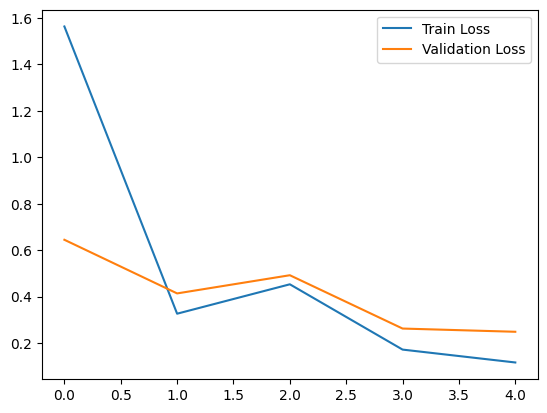

In [33]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

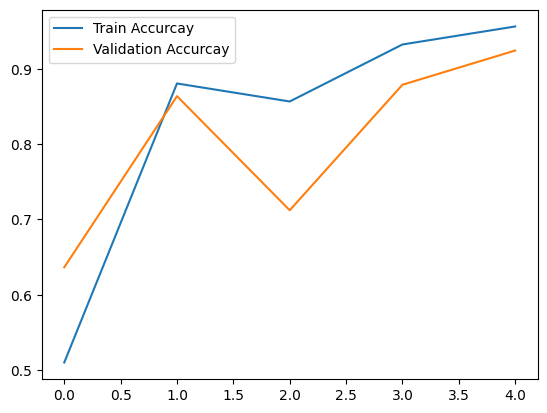

In [34]:
plt.plot(model_history.history['accuracy'], label = 'Train Accurcay')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accurcay')
plt.legend()
plt.show()

In [35]:
cnn_model.save('Covid19_model.h5')

In [20]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())
print(class_map)

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [23]:
import numpy as np
def prediction(test_image, actual_label):
    #load & Preprocessing image
    testing_image = image.load_img(test_image, target_size = (224, 224))
    testing_image_array = image.img_to_array(testing_image) / 255
    testing_image_input = testing_image_array.reshape(1, testing_image_array.shape[0],
                                                     testing_image_array.shape[1],
                                                     testing_image_array.shape[2])
    
    #prediction
    predicted_class = np.argmax(cnn_model.predict(testing_image_input))
    predicted_label = class_map[predicted_class]
    
    plt.figure(figsize = (4,4))
    plt.imshow(testing_image_array)
    plt.title('Actual Label : {}, Predicted Label : {}'.format(actual_label, predicted_label))
    
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


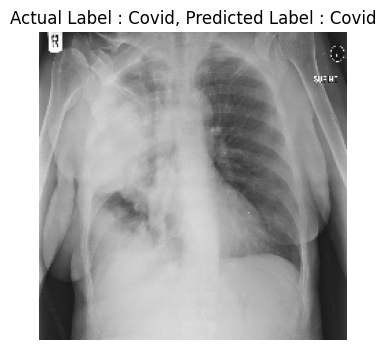

In [27]:
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0113.jpg'
prediction(test_image, actual_label = 'Covid')